<a href="https://colab.research.google.com/github/GHes31415/OT/blob/main/parameter_BVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
from ipywidgets import *

In [2]:

n = 150
# Boundary values
# Sig_0
sig0 = torch.tensor([[100,20],[20,40]],dtype = torch.float32)
D0,U0 = torch.linalg.eig(sig0)
sqrt_sig0 = torch.mm(torch.mm(U0,torch.diag(D0**(0.5))),torch.linalg.inv(U0)).float()
# Sig_1
sig1 = torch.tensor([[5,2],[2,4]],dtype = torch.float32)
D1,U1 = torch.linalg.eig(sig1)
sqrt_sig1 = torch.mm(torch.mm(U1,torch.diag(D1**(0.5))),torch.linalg.inv(U1)).float()

# Check for commutativity
print(torch.linalg.norm(torch.mm(sig0,sig1)-torch.mm(sig1,sig0)))




tensor(141.4214)


<ipython-input-2-d137f2626a59>:6: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at ../aten/src/ATen/native/Copy.cpp:276.)
  sqrt_sig0 = torch.mm(torch.mm(U0,torch.diag(D0**(0.5))),torch.linalg.inv(U0)).float()


In [ ]:
t = torch.linspace(0,1,n).reshape(n,1,1)
# Soluiton from parameter space
sqrt_gamma_t = sqrt_sig0*(1-t) + sqrt_sig1*t
print(torch.mm(sqrt_gamma_t[-1], sqrt_gamma_t[-1]))
gamma_t = torch.bmm(sqrt_gamma_t,sqrt_gamma_t)


tensor([[5.0000, 2.0000],
        [2.0000, 4.0000]])


In [ ]:
# Exact solution
product_1 = torch.mm(sqrt_sig0,torch.mm(sig1,sqrt_sig0))
D010,U010 = torch.linalg.eig(product_1)
sqrt_010 = torch.mm(torch.mm(U010,torch.diag(D010**(0.5))),torch.linalg.inv(U010)).float()
sig_t = torch.bmm((1-t)*sig0 + sqrt_010*t,(1-t)*sig0 + sqrt_010*t)
sqrt_sig0_inv = torch.linalg.inv(sqrt_sig0)*torch.ones(n,1,1)
sig_t = torch.bmm(torch.bmm(sqrt_sig0_inv,sig_t),sqrt_sig0_inv)

D2,U2 = torch.linalg.eig(sig_t[1])
sigt1 = torch.mm(torch.mm(U2,torch.diag(D2**(0.5))),torch.linalg.inv(U2)).float()
diff2 = (sigt1-sqrt_sig0)*n

In [ ]:
sig_t[0]-gamma_t[0]


tensor([[-5.3406e-05, -1.9073e-06],
        [-9.5367e-06, -7.6294e-06]])

In [ ]:
x,y = torch.linspace(-20,20,1000),torch.linspace(-20,20,1000)
X,Y = torch.meshgrid(x,y)
pos = torch.dstack((X,Y))

In [ ]:
def plot_diff_std(i = 0):

    gauss_1 = torch.distributions.MultivariateNormal(loc = torch.tensor([0,0]),covariance_matrix= gamma_t[int(i)])
    evaluation1 = torch.exp(gauss_1.log_prob(pos).reshape(X.size()))
    gauss_2 = torch.distributions.MultivariateNormal(loc = torch.tensor([0,0]),covariance_matrix= sig_t[int(i)])
    evaluation2 = torch.exp(gauss_2.log_prob(pos).reshape(X.size()))
    err = torch.abs(evaluation1-evaluation2)
    fig,ax = plt.subplots()
    # plt.contour(X.detach().numpy(),Y.detach().numpy(),evaluation1.detach().numpy(), cmap = 'hot')
    # plt.contour(X.detach().numpy(),Y.detach().numpy(),evaluation2.detach().numpy())
    cs = ax.contourf(X.detach().numpy(),Y.detach().numpy(),err.detach().numpy())
    cbar = fig.colorbar(cs)

    plt.show()




In [ ]:
interact(plot_diff_std,i = (0,n-1,1));

interactive(children=(IntSlider(value=0, description='i', max=149), Output()), _dom_classes=('widget-interact'…

In [ ]:
error_t = torch.linalg.norm(gamma_t-sig_t,dim =(1,2))


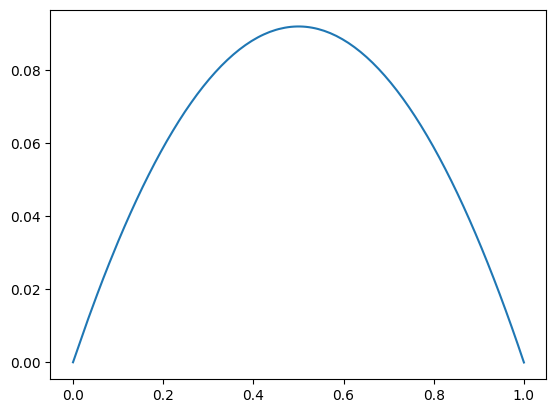

In [ ]:
plt.plot(np.linspace(0,1,n),error_t.detach().numpy())

# Numpy implementation

In [151]:
# Numpy implementation for higher precision
n = 150
# Boundary values
# Sig_0
sig0 = np.array([[100,20,30],[20,400,10],[30,10,50]])
D0,U0 = np.linalg.eig(sig0)
sqrt_sig0 = np.matmul(np.matmul(U0,np.diag(D0**(0.5))),np.linalg.inv(U0))

# Sig_1
sig1 = np.array([[3,-1.5,0.5],[-1.5,400,-10],[0.5,-10,80]])
D1,U1 = np.linalg.eig(sig1)
sqrt_sig1 = np.matmul(np.matmul(U1,np.diag(D1**(0.5))),np.linalg.inv(U1))
# Check for commutativity
print(np.linalg.norm(np.matmul(sig0,sig1)-np.matmul(sig1,sig0)))



15109.318316853345


In [152]:
t = np.linspace(0,1,n).reshape(n,1,1)

In [153]:
# Solution from parameter space
sqrt_gamma_t = sqrt_sig0*(1-t) + sqrt_sig1*t
#print(torch.mm(sqrt_gamma_t[-1], sqrt_gamma_t[-1]))
gamma_t = np.matmul(sqrt_gamma_t,sqrt_gamma_t)


In [154]:
# Exact solution
product_1 = (sqrt_sig0@sig1)@sqrt_sig0#torch.mm(sqrt_sig0,torch.mm(sig1,sqrt_sig0))
D010,U010 = np.linalg.eig(product_1)
sqrt_010 = (U010@(np.diag(D010**(0.5))))@np.linalg.inv(U010)
sig_t = np.matmul((1-t)*sig0 + sqrt_010*t,(1-t)*sig0 + sqrt_010*t)
sqrt_sig0_inv =np.linalg.inv(sqrt_sig0)*np.ones((n,1,1))
sig_t = np.matmul(np.matmul(sqrt_sig0_inv,sig_t),sqrt_sig0_inv)


In [155]:
Dt,Ut = np.linalg.eig(sig_t)

sqrt_sig_t = np.array([np.matmul(np.matmul(Ut[j],np.diag(Dt[j]**(0.5))),np.linalg.inv(Ut[j])) for j in range(len(Dt))])

In [156]:
x,y = np.linspace(-20,20,1000),np.linspace(-20,20,1000)
X,Y = np.meshgrid(x,y)
pos = np.dstack((X,Y))

In [157]:
def plot_diff_std(i = 0):
    # Only for 2x2 matrices
    gauss_1 = multivariate_normal(np.array([0,0]),gamma_t[int(i)])
    evaluation1 = gauss_1.pdf(pos)
    gauss_2 = multivariate_normal(np.array([0,0]),sig_t[int(i)])
    evaluation2 = gauss_2.pdf(pos)
    err = np.abs(evaluation1-evaluation2)
    fig,ax = plt.subplots()
    # plt.contour(X.detach().numpy(),Y.detach().numpy(),evaluation1.detach().numpy(), cmap = 'hot')
    # plt.contour(X.detach().numpy(),Y.detach().numpy(),evaluation2.detach().numpy())
    cs = ax.contourf(X,Y,err)
    cbar = fig.colorbar(cs)

    plt.show()

In [158]:
# interact(plot_diff_std,i = (0,n-1,1));

In [159]:
error_t = np.linalg.norm(gamma_t-sig_t)


In [160]:

error_t

41.09026118753595

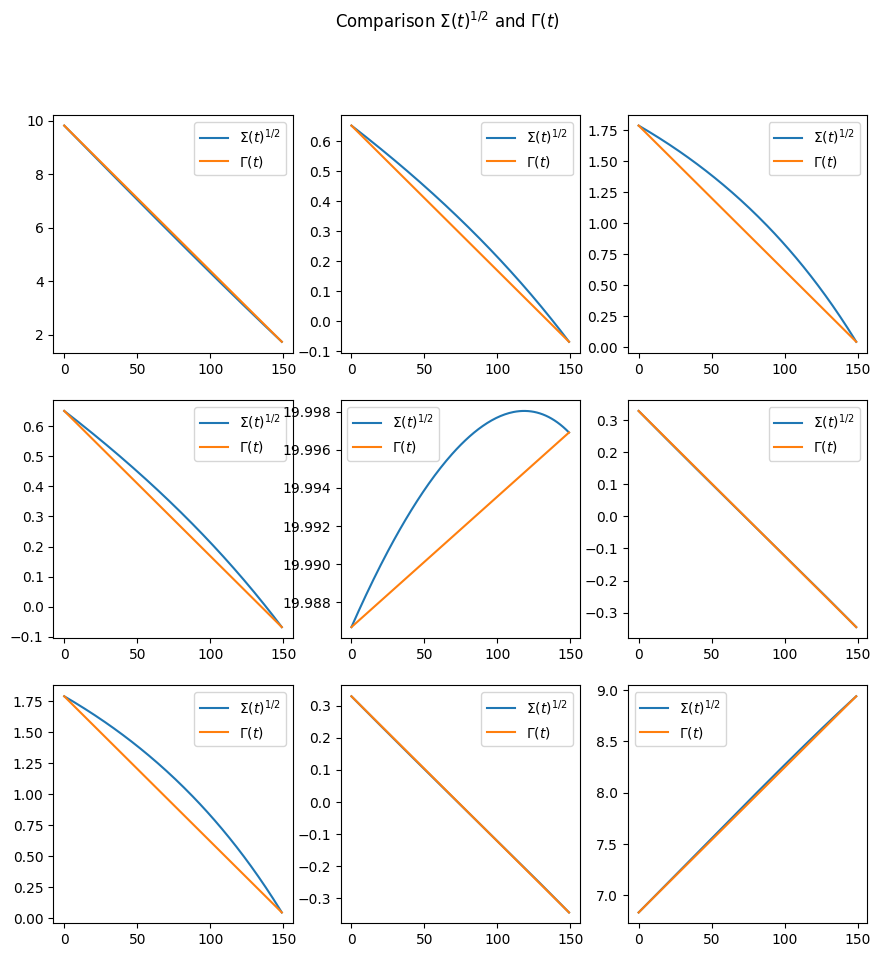

In [173]:
k = len(sig0)

fig, ax = plt.subplots(k,k)
fig.set_size_inches(10.5, 10.5)

for i in range(k):
  for j in range(k):
    ax[i,j].plot(sqrt_sig_t[:,i,j],label = '$\Sigma(t)^{1/2}$')
    ax[i,j].plot(sqrt_gamma_t[:,i,j],label = '$\Gamma(t)$')
    ax[i,j].legend()


fig.suptitle('Comparison $\Sigma(t)^{1/2}$ and $\Gamma(t)$')
plt.savefig('sig_sqrt_gamma_comp.png')



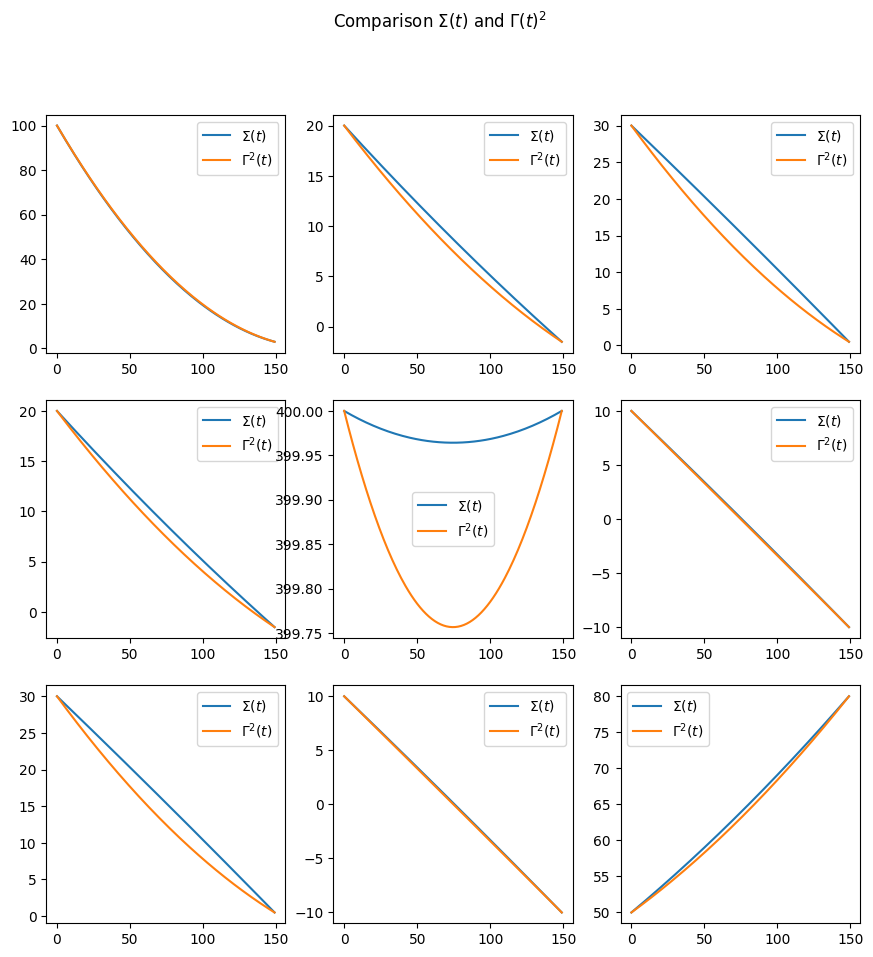

In [174]:
k = len(sig0)

fig, ax = plt.subplots(k,k)
fig.set_size_inches(10.5, 10.5)

for i in range(k):
  for j in range(k):
    ax[i,j].plot(sig_t[:,i,j],label = '$\Sigma(t)$')
    ax[i,j].plot(gamma_t[:,i,j],label = '$\Gamma^2(t)$')
    ax[i,j].legend()


fig.suptitle('Comparison $\Sigma(t)$ and $\Gamma(t)^2$')
plt.savefig('sig_gamma_squared_comp.png')



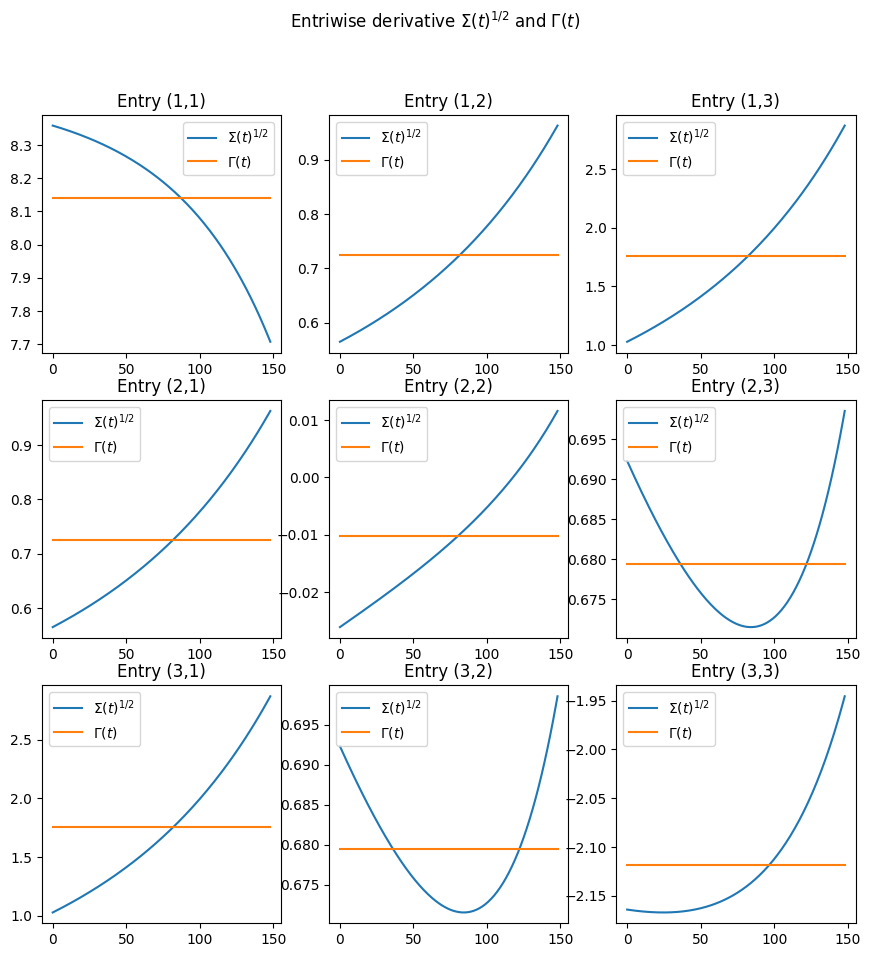

In [175]:

fig, ax = plt.subplots(k,k)
fig.set_size_inches(10.5, 10.5)

for i in range(k):
  for j in range(k):
    ax[i,j].set_title(f'Entry ({i+1},{j+1})')
    ax[i,j].plot((sqrt_sig_t[:-1,i,j]-sqrt_sig_t[1:,i,j])*n,label = '$\Sigma(t)^{1/2}$')
    ax[i,j].plot((sqrt_gamma_t[:-1,i,j]-sqrt_gamma_t[1:,i,j])*n,label = '$\Gamma(t)$')
    ax[i,j].legend()

fig.suptitle('Entriwise derivative $\Sigma(t)^{1/2}$ and $\Gamma(t)$')
plt.savefig('derivative_true_par_sqrt.png')


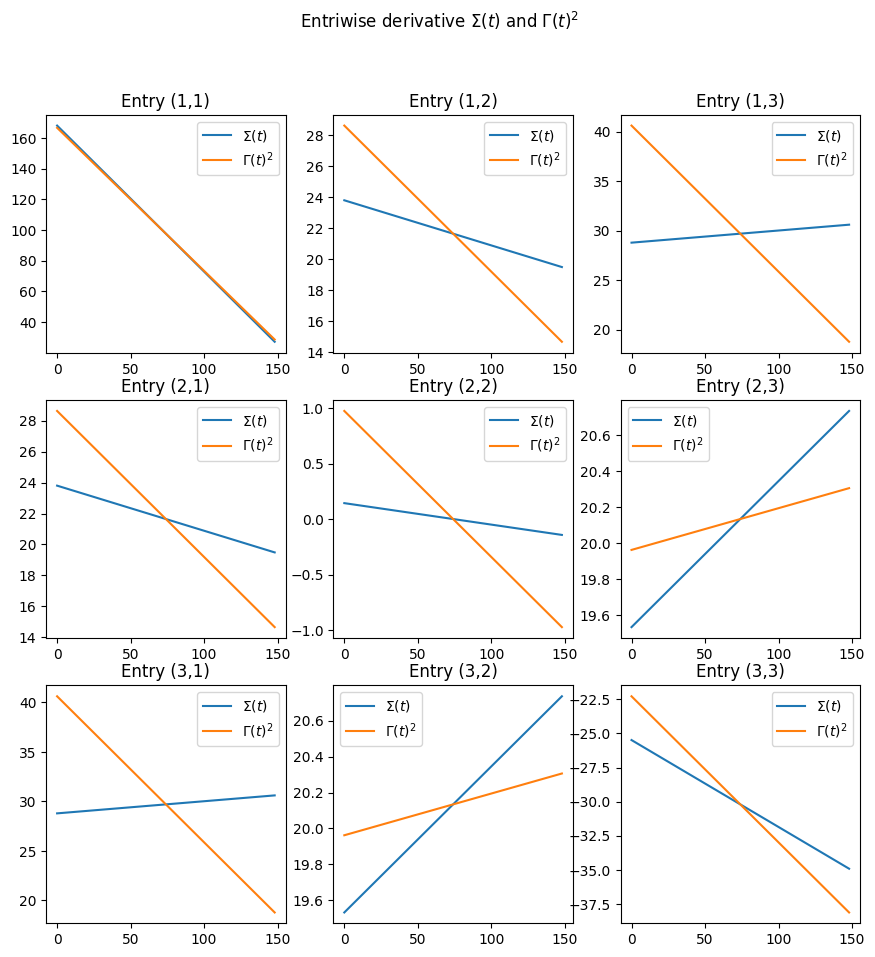

In [176]:
fig, ax = plt.subplots(k,k)
fig.set_size_inches(10.5, 10.5)

for i in range(k):
  for j in range(k):
    ax[i,j].set_title(f'Entry ({i+1},{j+1})')
    ax[i,j].plot((sig_t[:-1,i,j]-sig_t[1:,i,j])*n,label = '$\Sigma(t)$')
    ax[i,j].plot((gamma_t[:-1,i,j]-gamma_t[1:,i,j])*n,label = '$\Gamma(t)^2$')
    ax[i,j].legend()

fig.suptitle('Entriwise derivative $\Sigma(t)$ and $\Gamma(t)^2$')
plt.savefig('derivative_true_par_squared.png')